# Importation des librairies

In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score

from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB


import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns


# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

#spliting the dataset into train and test set
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
data1 = pd.read_csv('ger_data.csv')
labels = data1.iloc[:,-1] 

In [3]:
X = list(data1.columns)
X.remove("Actual_Score")
#to make output value  binary represenations 0-good 1-bad
Y = data1.Actual_Score-1

In [4]:
#creating dummies for X (catagorical variable present in X)
X= pd.get_dummies(data1[X],drop_first =True)


In [63]:
X.head()

,Duration,Credit_Amount,Installment,Residence,Age,Existing_Credits,Liable_People,Status_Account_A12,Status_Account_A13,Status_Account_A14,...,Property_A124,Other_Installment_A142,Other_Installment_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Tel_A192,Foreign_Worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [65]:
#building ROC curve 
def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)

    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()

In [66]:
#building the random forest classifier 
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
#predictive  values for test set 
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

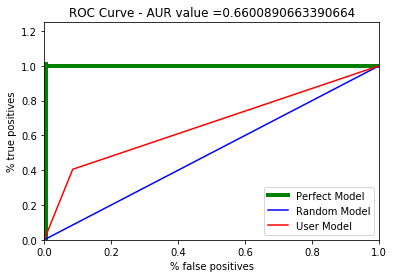

In [67]:
roccurve(y_values=y_test, y_preds_proba=y_pred)

In [68]:
#accuracy of the model
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[161  15]
 [ 44  30]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       176
           1       0.67      0.41      0.50        74

    accuracy                           0.76       250
   macro avg       0.73      0.66      0.67       250
weighted avg       0.75      0.76      0.74       250



In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [70]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.98
Accuracy of Random Forest classifier on test set: 0.71


In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rfc))

[[157  19]
 [ 54  20]]


In [72]:

print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       176
           1       0.51      0.27      0.35        74

    accuracy                           0.71       250
   macro avg       0.63      0.58      0.58       250
weighted avg       0.68      0.71      0.68       250



# RF with MinMaxScaler

In [75]:
labels = data1.iloc[:,-1]   # Enregistrer la varialbe target
data1 = data1.iloc[:,0:-1]; # Enleveer la colonne target
data1 = data1.drop(columns="Tel") # Enlever la colonne tel

In [76]:
data_cat = data1.select_dtypes(include=['object'])
data_cat_og = data1.select_dtypes(include=['object'])
data_num_og = data1._get_numeric_data()
data_num = data1._get_numeric_data()

for col in data_cat:
    onehot = pd.get_dummies(data_cat[col])
    data_cat = data_cat.drop(col,axis = 1)
    data_cat = data_cat.join(onehot)
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_num_sc = pd.DataFrame(scaler.fit_transform(data_num), columns=data_num.columns)

# Rescaling avec la valeur moyenne et l'écart-type
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#data_num_sc = pd.DataFrame(ss.fit_transform(data_num), columns=data_num.columns)

data = [data_num_sc,data_cat]
data_join = pd.concat(data,axis=1)

In [78]:
X=data_join
y=labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.78      0.88      0.83       176
           2       0.59      0.41      0.48        74

    accuracy                           0.74       250
   macro avg       0.68      0.64      0.65       250
weighted avg       0.72      0.74      0.72       250



# LGBM

In [19]:
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0) 



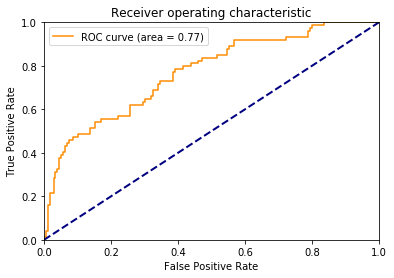

In [23]:
import lightgbm as lgb

# fit, train and cross validate Decision Tree with training and test data 
def lgbclf(X_train, y_train,X_test, y_test):

    model = lgb.LGBMClassifier().fit(X_train, y_train)
    print(model,'\n')

    # Predict target variables y for test data
    y_pred_lightgbm = model.predict_proba(X_test)[:,1]

    # Get Cross Validation and Confusion matrix
    #get_eval(model, X_train, y_train,y_test,y_pred)
    #get_eval2(model, X_train, y_train,X_test, y_test,y_pred)
    get_roc (y_test,y_pred_lightgbm)
    return


lgbclf(X_train, y_train,X_test, y_test)

In [98]:
print(classification_report(y_test,y_pred_lightgbm))

# Logistic Regression

LogisticRegression


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 



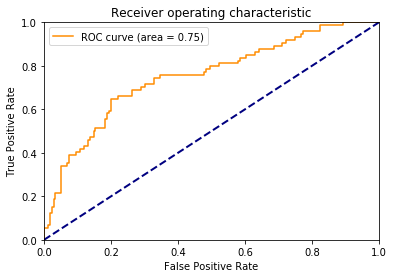

In [24]:
from sklearn.linear_model import LogisticRegression

# fit, train and cross validate Decision Tree with training and test data 
def logregclf(X_train, y_train,X_test, y_test):
    print("LogisticRegression")
    model = LogisticRegression().fit(X_train, y_train)
    print(model,'\n')

    # Predict target variables y for test data
    y_pred_logistic_regression = model.predict_proba(X_test)[:,1]

    # Get Cross Validation and Confusion matrix
    #get_eval(model, X_train, y_train,y_test,y_pred)
    #get_eval2(model, X_train, y_train,X_test, y_test,y_pred)
    get_roc (y_test,y_pred_logistic_regression)
    return

# Logistic Regression
#logregclf(X_train, y_train,X_test,y_test)
logregclf(X_train, y_train,X_test, y_test)

In [25]:
print(classification_report(y_test,y_pred_lightgbm))

## Decision Tree classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))
print(confusion_matrix(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.82      0.76      0.79       176
           2       0.52      0.61      0.56        74

    accuracy                           0.72       250
   macro avg       0.67      0.68      0.67       250
weighted avg       0.73      0.72      0.72       250

[[134  42]
 [ 29  45]]


# Kfold algorithm

In [31]:

features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7386666666666667


# Kfold Accuracy

In [32]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")

0.708


[[141  35]
 [ 38  36]]




In [36]:
#Seting the Hyper Parameters
from xgboost import XGBClassifier
param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=2, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.75, 0.8, 0.85],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 

In [49]:
model_xg.fit(X_train, y_train)

y_pred_xgboost = model_xg.predict(X_test)

y_pred_grid_search=grid_search.predict(X_test)

# Xgboost Accuracy

In [50]:
print(accuracy_score(y_test,y_pred_xgboost))
print("\n")
print(confusion_matrix(y_test, y_pred_xgboost))
print("\n")

0.768


[[156  20]
 [ 38  36]]




# GridSearch Accuracy

In [55]:
print(accuracy_score(y_test,y_pred_grid_search))
print("\n")
print(confusion_matrix(y_test,y_pred_grid_search))
print("\n")

0.756


[[151  25]
 [ 36  38]]




In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
import sklearn.metrics as sklm
import xgboost as xgb
from catboost import Pool, CatBoostClassifier, cv

In [11]:
catt = CatBoostClassifier(iterations=1500, depth=8, learning_rate=0.03,eval_metric='Accuracy',use_best_model=True, random_seed=0)
catt_model=catt.fit(X_train,y_train,cat_features=cate_features_index,eval_set=(X_test,y_test))

0:	learn: 0.7013333	test: 0.6920000	best: 0.6920000 (0)	total: 207ms	remaining: 5m 10s
1:	learn: 0.7013333	test: 0.7040000	best: 0.7040000 (1)	total: 228ms	remaining: 2m 51s
2:	learn: 0.7053333	test: 0.7080000	best: 0.7080000 (2)	total: 294ms	remaining: 2m 26s
3:	learn: 0.6986667	test: 0.7040000	best: 0.7080000 (2)	total: 312ms	remaining: 1m 56s
4:	learn: 0.7013333	test: 0.7040000	best: 0.7080000 (2)	total: 348ms	remaining: 1m 43s
5:	learn: 0.7026667	test: 0.7040000	best: 0.7080000 (2)	total: 387ms	remaining: 1m 36s
6:	learn: 0.7013333	test: 0.7080000	best: 0.7080000 (2)	total: 422ms	remaining: 1m 30s
7:	learn: 0.7013333	test: 0.7040000	best: 0.7080000 (2)	total: 436ms	remaining: 1m 21s
8:	learn: 0.7000000	test: 0.7040000	best: 0.7080000 (2)	total: 445ms	remaining: 1m 13s
9:	learn: 0.7013333	test: 0.7040000	best: 0.7080000 (2)	total: 482ms	remaining: 1m 11s
10:	learn: 0.7000000	test: 0.7040000	best: 0.7080000 (2)	total: 491ms	remaining: 1m 6s
11:	learn: 0.7000000	test: 0.7040000	best: 

94:	learn: 0.7320000	test: 0.7280000	best: 0.7280000 (94)	total: 3.55s	remaining: 52.6s
95:	learn: 0.7360000	test: 0.7280000	best: 0.7280000 (94)	total: 3.57s	remaining: 52.2s
96:	learn: 0.7346667	test: 0.7280000	best: 0.7280000 (94)	total: 3.62s	remaining: 52.3s
97:	learn: 0.7346667	test: 0.7240000	best: 0.7280000 (94)	total: 3.63s	remaining: 52s
98:	learn: 0.7373333	test: 0.7240000	best: 0.7280000 (94)	total: 3.65s	remaining: 51.7s
99:	learn: 0.7360000	test: 0.7240000	best: 0.7280000 (94)	total: 3.67s	remaining: 51.4s
100:	learn: 0.7360000	test: 0.7240000	best: 0.7280000 (94)	total: 3.67s	remaining: 50.9s
101:	learn: 0.7373333	test: 0.7280000	best: 0.7280000 (94)	total: 3.75s	remaining: 51.4s
102:	learn: 0.7373333	test: 0.7280000	best: 0.7280000 (94)	total: 3.76s	remaining: 51s
103:	learn: 0.7373333	test: 0.7280000	best: 0.7280000 (94)	total: 3.84s	remaining: 51.5s
104:	learn: 0.7373333	test: 0.7280000	best: 0.7280000 (94)	total: 3.85s	remaining: 51.1s
105:	learn: 0.7386667	test: 0.7

192:	learn: 0.7906667	test: 0.7520000	best: 0.7520000 (166)	total: 6.84s	remaining: 46.3s
193:	learn: 0.7933333	test: 0.7520000	best: 0.7520000 (166)	total: 6.87s	remaining: 46.3s
194:	learn: 0.7933333	test: 0.7480000	best: 0.7520000 (166)	total: 6.91s	remaining: 46.2s
195:	learn: 0.7946667	test: 0.7480000	best: 0.7520000 (166)	total: 6.93s	remaining: 46.1s
196:	learn: 0.7946667	test: 0.7480000	best: 0.7520000 (166)	total: 6.99s	remaining: 46.2s
197:	learn: 0.7946667	test: 0.7480000	best: 0.7520000 (166)	total: 7.02s	remaining: 46.2s
198:	learn: 0.7960000	test: 0.7480000	best: 0.7520000 (166)	total: 7.05s	remaining: 46.1s
199:	learn: 0.7960000	test: 0.7480000	best: 0.7520000 (166)	total: 7.09s	remaining: 46.1s
200:	learn: 0.7973333	test: 0.7480000	best: 0.7520000 (166)	total: 7.14s	remaining: 46.1s
201:	learn: 0.8026667	test: 0.7440000	best: 0.7520000 (166)	total: 7.24s	remaining: 46.5s
202:	learn: 0.8026667	test: 0.7400000	best: 0.7520000 (166)	total: 7.34s	remaining: 46.9s
203:	learn

284:	learn: 0.8520000	test: 0.7440000	best: 0.7560000 (224)	total: 12s	remaining: 51.4s
285:	learn: 0.8520000	test: 0.7440000	best: 0.7560000 (224)	total: 12.1s	remaining: 51.5s
286:	learn: 0.8520000	test: 0.7440000	best: 0.7560000 (224)	total: 12.2s	remaining: 51.4s
287:	learn: 0.8520000	test: 0.7440000	best: 0.7560000 (224)	total: 12.2s	remaining: 51.5s
288:	learn: 0.8506667	test: 0.7440000	best: 0.7560000 (224)	total: 12.2s	remaining: 51.3s
289:	learn: 0.8506667	test: 0.7440000	best: 0.7560000 (224)	total: 12.3s	remaining: 51.4s
290:	learn: 0.8506667	test: 0.7440000	best: 0.7560000 (224)	total: 12.4s	remaining: 51.5s
291:	learn: 0.8533333	test: 0.7440000	best: 0.7560000 (224)	total: 12.5s	remaining: 51.7s
292:	learn: 0.8546667	test: 0.7440000	best: 0.7560000 (224)	total: 12.6s	remaining: 51.8s
293:	learn: 0.8546667	test: 0.7440000	best: 0.7560000 (224)	total: 12.7s	remaining: 52s
294:	learn: 0.8546667	test: 0.7440000	best: 0.7560000 (224)	total: 12.8s	remaining: 52.2s
295:	learn: 0.

376:	learn: 0.9053333	test: 0.7520000	best: 0.7560000 (224)	total: 19.6s	remaining: 58.5s
377:	learn: 0.9053333	test: 0.7480000	best: 0.7560000 (224)	total: 19.7s	remaining: 58.5s
378:	learn: 0.9066667	test: 0.7520000	best: 0.7560000 (224)	total: 19.8s	remaining: 58.5s
379:	learn: 0.9066667	test: 0.7520000	best: 0.7560000 (224)	total: 19.9s	remaining: 58.6s
380:	learn: 0.9080000	test: 0.7520000	best: 0.7560000 (224)	total: 20s	remaining: 58.8s
381:	learn: 0.9080000	test: 0.7520000	best: 0.7560000 (224)	total: 20.1s	remaining: 58.9s
382:	learn: 0.9080000	test: 0.7520000	best: 0.7560000 (224)	total: 20.2s	remaining: 58.9s
383:	learn: 0.9106667	test: 0.7560000	best: 0.7560000 (224)	total: 20.3s	remaining: 58.9s
384:	learn: 0.9120000	test: 0.7560000	best: 0.7560000 (224)	total: 20.4s	remaining: 59s
385:	learn: 0.9120000	test: 0.7560000	best: 0.7560000 (224)	total: 20.5s	remaining: 59s
386:	learn: 0.9120000	test: 0.7520000	best: 0.7560000 (224)	total: 20.5s	remaining: 59.1s
387:	learn: 0.91

472:	learn: 0.9373333	test: 0.7480000	best: 0.7560000 (224)	total: 27.9s	remaining: 1m
473:	learn: 0.9373333	test: 0.7480000	best: 0.7560000 (224)	total: 28s	remaining: 1m
474:	learn: 0.9360000	test: 0.7560000	best: 0.7560000 (224)	total: 28.1s	remaining: 1m
475:	learn: 0.9360000	test: 0.7560000	best: 0.7560000 (224)	total: 28.2s	remaining: 1m
476:	learn: 0.9360000	test: 0.7560000	best: 0.7560000 (224)	total: 28.3s	remaining: 1m
477:	learn: 0.9360000	test: 0.7560000	best: 0.7560000 (224)	total: 28.3s	remaining: 1m
478:	learn: 0.9373333	test: 0.7560000	best: 0.7560000 (224)	total: 28.4s	remaining: 1m
479:	learn: 0.9346667	test: 0.7520000	best: 0.7560000 (224)	total: 28.5s	remaining: 1m
480:	learn: 0.9360000	test: 0.7520000	best: 0.7560000 (224)	total: 28.6s	remaining: 1m
481:	learn: 0.9346667	test: 0.7560000	best: 0.7560000 (224)	total: 28.7s	remaining: 1m
482:	learn: 0.9360000	test: 0.7520000	best: 0.7560000 (224)	total: 28.8s	remaining: 1m
483:	learn: 0.9386667	test: 0.7520000	best: 0

568:	learn: 0.9613333	test: 0.7600000	best: 0.7680000 (521)	total: 36.2s	remaining: 59.2s
569:	learn: 0.9626667	test: 0.7600000	best: 0.7680000 (521)	total: 36.3s	remaining: 59.2s
570:	learn: 0.9626667	test: 0.7600000	best: 0.7680000 (521)	total: 36.4s	remaining: 59.2s
571:	learn: 0.9626667	test: 0.7600000	best: 0.7680000 (521)	total: 36.5s	remaining: 59.2s
572:	learn: 0.9626667	test: 0.7600000	best: 0.7680000 (521)	total: 36.6s	remaining: 59.1s
573:	learn: 0.9626667	test: 0.7560000	best: 0.7680000 (521)	total: 36.6s	remaining: 59.1s
574:	learn: 0.9626667	test: 0.7560000	best: 0.7680000 (521)	total: 36.7s	remaining: 59.1s
575:	learn: 0.9626667	test: 0.7520000	best: 0.7680000 (521)	total: 36.8s	remaining: 59s
576:	learn: 0.9626667	test: 0.7520000	best: 0.7680000 (521)	total: 36.9s	remaining: 59s
577:	learn: 0.9613333	test: 0.7520000	best: 0.7680000 (521)	total: 37s	remaining: 59s
578:	learn: 0.9613333	test: 0.7520000	best: 0.7680000 (521)	total: 37s	remaining: 58.9s
579:	learn: 0.965333

662:	learn: 0.9773333	test: 0.7560000	best: 0.7680000 (521)	total: 44.5s	remaining: 56.2s
663:	learn: 0.9773333	test: 0.7560000	best: 0.7680000 (521)	total: 44.6s	remaining: 56.2s
664:	learn: 0.9773333	test: 0.7600000	best: 0.7680000 (521)	total: 44.7s	remaining: 56.1s
665:	learn: 0.9773333	test: 0.7600000	best: 0.7680000 (521)	total: 44.8s	remaining: 56.1s
666:	learn: 0.9773333	test: 0.7600000	best: 0.7680000 (521)	total: 44.9s	remaining: 56.1s
667:	learn: 0.9773333	test: 0.7600000	best: 0.7680000 (521)	total: 45s	remaining: 56s
668:	learn: 0.9773333	test: 0.7600000	best: 0.7680000 (521)	total: 45.1s	remaining: 56s
669:	learn: 0.9773333	test: 0.7600000	best: 0.7680000 (521)	total: 45.1s	remaining: 55.9s
670:	learn: 0.9773333	test: 0.7600000	best: 0.7680000 (521)	total: 45.2s	remaining: 55.9s
671:	learn: 0.9773333	test: 0.7600000	best: 0.7680000 (521)	total: 45.3s	remaining: 55.8s
672:	learn: 0.9773333	test: 0.7600000	best: 0.7680000 (521)	total: 45.4s	remaining: 55.8s
673:	learn: 0.97

755:	learn: 0.9866667	test: 0.7520000	best: 0.7680000 (521)	total: 52.6s	remaining: 51.8s
756:	learn: 0.9866667	test: 0.7520000	best: 0.7680000 (521)	total: 52.7s	remaining: 51.7s
757:	learn: 0.9866667	test: 0.7520000	best: 0.7680000 (521)	total: 52.8s	remaining: 51.6s
758:	learn: 0.9866667	test: 0.7520000	best: 0.7680000 (521)	total: 52.9s	remaining: 51.6s
759:	learn: 0.9866667	test: 0.7560000	best: 0.7680000 (521)	total: 53s	remaining: 51.6s
760:	learn: 0.9866667	test: 0.7560000	best: 0.7680000 (521)	total: 53s	remaining: 51.5s
761:	learn: 0.9866667	test: 0.7560000	best: 0.7680000 (521)	total: 53.1s	remaining: 51.5s
762:	learn: 0.9866667	test: 0.7560000	best: 0.7680000 (521)	total: 53.2s	remaining: 51.4s
763:	learn: 0.9866667	test: 0.7560000	best: 0.7680000 (521)	total: 53.3s	remaining: 51.4s
764:	learn: 0.9866667	test: 0.7520000	best: 0.7680000 (521)	total: 53.4s	remaining: 51.3s
765:	learn: 0.9880000	test: 0.7520000	best: 0.7680000 (521)	total: 53.5s	remaining: 51.2s
766:	learn: 0.

847:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m	remaining: 46.6s
848:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m	remaining: 46.6s
849:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m	remaining: 46.5s
850:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m	remaining: 46.5s
851:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 1s	remaining: 46.4s
852:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 1s	remaining: 46.4s
853:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 1s	remaining: 46.3s
854:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 1s	remaining: 46.3s
855:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 1s	remaining: 46.2s
856:	learn: 0.9920000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 1s	remaining: 46.1s
857:	learn: 0.9933333	test: 0.7560000	best: 0.7680000 (521)	total: 1m 1s	remaining: 46.1s
858:	learn: 0.9933333	

940:	learn: 0.9960000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 8s	remaining: 40.9s
941:	learn: 0.9960000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 8s	remaining: 40.9s
942:	learn: 0.9960000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 9s	remaining: 40.8s
943:	learn: 0.9960000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 9s	remaining: 40.7s
944:	learn: 0.9960000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 9s	remaining: 40.7s
945:	learn: 0.9960000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 9s	remaining: 40.6s
946:	learn: 0.9960000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 9s	remaining: 40.5s
947:	learn: 0.9960000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 9s	remaining: 40.5s
948:	learn: 0.9960000	test: 0.7480000	best: 0.7680000 (521)	total: 1m 9s	remaining: 40.4s
949:	learn: 0.9973333	test: 0.7480000	best: 0.7680000 (521)	total: 1m 9s	remaining: 40.3s
950:	learn: 0.9973333	test: 0.7520000	best: 0.7680000 (521)	total: 1m 9s	remaining: 40.3s
951:	learn

1031:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 16s	remaining: 34.9s
1032:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 17s	remaining: 34.8s
1033:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 17s	remaining: 34.8s
1034:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 17s	remaining: 34.7s
1035:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 17s	remaining: 34.6s
1036:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 17s	remaining: 34.6s
1037:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 17s	remaining: 34.5s
1038:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 17s	remaining: 34.4s
1039:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 17s	remaining: 34.4s
1040:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 17s	remaining: 34.3s
1041:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 17s	remai

1122:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 24s	remaining: 28.5s
1123:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 24s	remaining: 28.4s
1124:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 24s	remaining: 28.3s
1125:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 25s	remaining: 28.3s
1126:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 25s	remaining: 28.2s
1127:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 25s	remaining: 28.1s
1128:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 25s	remaining: 28s
1129:	learn: 0.9986667	test: 0.7560000	best: 0.7680000 (521)	total: 1m 25s	remaining: 28s
1130:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 25s	remaining: 27.9s
1131:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 25s	remaining: 27.8s
1132:	learn: 0.9986667	test: 0.7520000	best: 0.7680000 (521)	total: 1m 25s	remaining

1214:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 32s	remaining: 21.8s
1215:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 32s	remaining: 21.7s
1216:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 33s	remaining: 21.6s
1217:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 33s	remaining: 21.6s
1218:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 33s	remaining: 21.5s
1219:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 33s	remaining: 21.4s
1220:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 33s	remaining: 21.3s
1221:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 33s	remaining: 21.3s
1222:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 33s	remaining: 21.2s
1223:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 33s	remaining: 21.1s
1224:	learn: 1.0000000	test: 0.7520000	best: 0.7680000 (521)	total: 1m 33s	remai

1304:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 40s	remaining: 15s
1305:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 40s	remaining: 15s
1306:	learn: 1.0000000	test: 0.7600000	best: 0.7680000 (521)	total: 1m 40s	remaining: 14.9s
1307:	learn: 1.0000000	test: 0.7600000	best: 0.7680000 (521)	total: 1m 40s	remaining: 14.8s
1308:	learn: 1.0000000	test: 0.7600000	best: 0.7680000 (521)	total: 1m 41s	remaining: 14.7s
1309:	learn: 1.0000000	test: 0.7600000	best: 0.7680000 (521)	total: 1m 41s	remaining: 14.7s
1310:	learn: 1.0000000	test: 0.7600000	best: 0.7680000 (521)	total: 1m 41s	remaining: 14.6s
1311:	learn: 1.0000000	test: 0.7600000	best: 0.7680000 (521)	total: 1m 41s	remaining: 14.5s
1312:	learn: 1.0000000	test: 0.7600000	best: 0.7680000 (521)	total: 1m 41s	remaining: 14.4s
1313:	learn: 1.0000000	test: 0.7600000	best: 0.7680000 (521)	total: 1m 41s	remaining: 14.4s
1314:	learn: 1.0000000	test: 0.7600000	best: 0.7680000 (521)	total: 1m 41s	remaining

1394:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 48s	remaining: 8.16s
1395:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 48s	remaining: 8.08s
1396:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 48s	remaining: 8s
1397:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 48s	remaining: 7.93s
1398:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 48s	remaining: 7.85s
1399:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 48s	remaining: 7.77s
1400:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 48s	remaining: 7.69s
1401:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 48s	remaining: 7.62s
1402:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 49s	remaining: 7.54s
1403:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 49s	remaining: 7.46s
1404:	learn: 1.0000000	test: 0.7560000	best: 0.7680000 (521)	total: 1m 49s	remainin

1485:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 56s	remaining: 1.09s
1486:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 56s	remaining: 1.02s
1487:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 56s	remaining: 939ms
1488:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 56s	remaining: 861ms
1489:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 56s	remaining: 782ms
1490:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 56s	remaining: 704ms
1491:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 56s	remaining: 626ms
1492:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 56s	remaining: 548ms
1493:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 56s	remaining: 470ms
1494:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 57s	remaining: 391ms
1495:	learn: 1.0000000	test: 0.7640000	best: 0.7680000 (521)	total: 1m 57s	remai

In [10]:
cate_features_index = np.where(X.dtypes != float)[0];cate_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
      dtype=int64)

In [15]:
y_pred_catt = catt_model.predict(X_test)
print(catt_model,'\n')
print(confusion_matrix(y_test,y_pred_catt))
print(classification_report(y_test,y_pred_catt))
roc=roc_auc_score(y_test,y_pred_catt)
acc = accuracy_score(y_test,y_pred_catt)
prec = precision_score(y_test,y_pred_catt)
rec = recall_score(y_test,y_pred_catt)
f1 = f1_score(y_test,y_pred_catt)
model =  pd.DataFrame([['Catboost', acc,prec,rec, f1,roc]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
M = Models_results.append(model, ignore_index = True)
print('Accuracy of Catboost classifier on training set: {:.2f}'.format(catt.score(X_train, y_train)))
print('Accuracy of Catboost classifier on test set: {:.2f}'.format(catt.score(X_test, y_test)))


[[168   8]
 [ 50  24]]
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       176
           1       0.75      0.32      0.45        74

    accuracy                           0.77       250
   macro avg       0.76      0.64      0.65       250
weighted avg       0.76      0.77      0.73       250

Accuracy of Catboost classifier on training set: 0.86
Accuracy of Catboost classifier on test set: 0.77


In [13]:
Models_results=pd.DataFrame()

In [14]:

from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [16]:
M

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Catboost,0.768,0.75,0.324324,0.45283,0.639435
